In [1]:
import networkx as nx
import numpy as np
import pandas as pd
%matplotlib inline

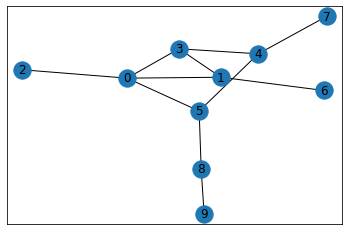

In [2]:
G1 = nx.Graph()
G1.add_edges_from([(0, 1),
                   (0, 2),
                   (0, 3),
                   (0, 5),
                   (1, 3),
                   (1, 6),
                   (3, 4),
                   (4, 5),
                   (4, 7),
                   (5, 8),
                   (8, 9)])
nx.draw_networkx(G1)

In [3]:
!cat G_adjlist.txt

0 1 2 3 5
1 3 6
2
3 4
4 5 7
5 8
6
7
8 9
9


In [4]:
G2 = nx.read_adjlist('G_adjlist.txt', nodetype=int)
G2.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (5, 4), (5, 8), (4, 7), (8, 9)])

In [5]:
G_mat = np.array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
                  [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
                  [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])
G_mat

array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [6]:
G3 = nx.Graph(G_mat)
G3.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (4, 5), (4, 7), (5, 8), (8, 9)])

Edgelist

In [7]:
!cat G_edgelist.txt

0 1 4
0 2 3
0 3 2
0 5 6
1 3 2
1 6 5
3 4 3
4 5 1
4 7 2
5 8 6
8 9 1


In [8]:
G4 = nx.read_edgelist('G_edgelist.txt', data = [('Weight', int)])
list(G4.edges(data = True))

[('0', '1', {'Weight': 4}),
 ('0', '2', {'Weight': 3}),
 ('0', '3', {'Weight': 2}),
 ('0', '5', {'Weight': 6}),
 ('1', '3', {'Weight': 2}),
 ('1', '6', {'Weight': 5}),
 ('3', '4', {'Weight': 3}),
 ('5', '4', {'Weight': 1}),
 ('5', '8', {'Weight': 6}),
 ('4', '7', {'Weight': 2}),
 ('8', '9', {'Weight': 1})]

In [9]:
list(G4.edges())

[('0', '1'),
 ('0', '2'),
 ('0', '3'),
 ('0', '5'),
 ('1', '3'),
 ('1', '6'),
 ('3', '4'),
 ('5', '4'),
 ('5', '8'),
 ('4', '7'),
 ('8', '9')]

In [10]:
G_df = pd.read_csv('G_edgelist.txt', delim_whitespace = True, header = None, names = ['n1','n2', 'weight'])
G_df

,n1,n2,weight
0,0,1,4
1,0,2,3
2,0,3,2
3,0,5,6
4,1,3,2
5,1,6,5
6,3,4,3
7,4,5,1
8,4,7,2
9,5,8,6


In [11]:
G5 = nx.from_pandas_edgelist(G_df, 'n1','n2', edge_attr = 'weight')
list(G5.edges(data = True))

[(0, 1, {'weight': 4}),
 (0, 2, {'weight': 3}),
 (0, 3, {'weight': 2}),
 (0, 5, {'weight': 6}),
 (1, 3, {'weight': 2}),
 (1, 6, {'weight': 5}),
 (3, 4, {'weight': 3}),
 (5, 4, {'weight': 1}),
 (5, 8, {'weight': 6}),
 (4, 7, {'weight': 2}),
 (8, 9, {'weight': 1})]

In [12]:
!head -5 chess_graph.txt

1 2 0	885635999.999997
1 3 0	885635999.999997
1 4 0	885635999.999997
1 5 1	885635999.999997
1 6 0	885635999.999997


In [13]:
chess = nx.read_edgelist('chess_graph.txt', data = [('outcome', int), ('timestamp', float)], create_using = nx.MultiDiGraph())

In [14]:
chess.is_directed()

True

In [15]:
chess.is_multigraph()

True

In [16]:
#chess.edges()

In [17]:
#chess.edges(data = True)

In [18]:
games_played = dict(chess.degree())

In [19]:
#games_played

In [20]:
max_value = max((games_played))

In [22]:
max_key = max((games_played), key = lambda x: dict(games_played)[x])
max_value = games_played[max_key]

In [23]:
print('Player: {} Games: {}'.format(max_key, max_value))

Player: 461 Games: 280


In [26]:
df = pd.DataFrame(chess.edges(data = True), columns = ['white', 'black','outcome'])

In [30]:
df['outcome'] = df['outcome'].apply(lambda x: x['outcome'])

In [31]:
df

,white,black,outcome
0,1,2,0
1,1,3,0
2,1,4,0
3,1,5,1
4,1,6,0
...,...,...,...
65048,7291,5936,0
65049,7293,7291,0
65050,7294,7283,1
65051,7295,776,0


In [38]:
df[df['outcome'] == 1].groupby('white')['outcome'].sum()

white
1       4
100     4
1002    1
1003    4
1005    5
       ..
995     5
996     2
997     7
998     3
999     3
Name: outcome, Length: 4330, dtype: int64

In [41]:
won_as_white = df[df['outcome']==1].groupby('white').sum()
won_as_black = -df[df['outcome']==-1].groupby('black').sum()
won_as_white

,outcome
white,
1,4
100,4
1002,1
1003,4
1005,5
...,...
995,5
996,2
997,7


In [42]:
win_count = won_as_white.add(won_as_black, fill_value = 0)
win_count

,outcome
1,7.0
100,7.0
1000,1.0
1002,1.0
1003,5.0
...,...
995,7.0
996,3.0
997,13.0
998,3.0


In [43]:
win_count.nlargest(5, 'outcome')

,outcome
330,109.0
467,103.0
98,94.0
456,88.0
461,88.0
